# Homework 6

#Data 3401; class #26258

#Aaron Alexaner Gluch

#1001806336 / aag6336

## Exercise 1
1. Download the `wdbc.names` and `wdbc.data` text files. These come from the UCI repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)  (Note I have cleaned the data some for you, so don't download it from the website, use the ones here)
1. Use the native `open` command of Python to display the txt file `wdbc.names`
1. Read the dataset from the `wdbc.data` file into a variable called `data` using pandas

In [98]:
# Write your solutions here
#1
with open("wdbc.names", "r") as f:
    print(f.read())
#2  
cols = ["id", "diagnosis"]
features = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave_points", "symmetry", "fractal_dimension"]
for rt in ["mean", "se", "worst"]:
    for feature in features:
        cols.append(rt + "_" + feature)

data = pd.read_csv("wdbc.data", header=None, names=cols)

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

## Exercise 2
1. Display the data header using pandas
1. Are there any columns that are not useful to analyzing this data?
1. Decide what to do with the non-numerical data values, and modify your dataframe
1. Extract the column of labels (Malignant or Benign, which should now be numerical values) from the dataframe and store it as a variable called `labels`

In [55]:
# Write your solutions here
#1. Display the data header:
print(data.head())
#2. The standard errors of the patients' features probably aren't very useful.
#3. Benign = 0, Malignant = 1
data["diagnosis"] = data["diagnosis"].replace({"B": 0, "M": 1})
labels = data['diagnosis'].to_list()
print(labels)

         id  diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst_radius  worst_texture  worst_perimeter  wo

## Exercise 3
1. Plot the data in 5 different ways of your choosing (i.e., plot column 2 vs. column 3 or column 8 vs. column 1, etc.)
    1. Your plot should be a scatter plot and should color the points according to whether the cancer is Malignant or Benign
1. Use the scatter_matrix function from pandas to create the scatter matrix for this dataframe
1. Now, create new variables `x` and `y` which are numpy arrays from your `data` and `labels` dataframes
1. Using these, run the segment of code in the cell below which implements PCA on x (color code is green for benign and red for malignant)
1. Compare this plot to the ones from step 1. Do you notice any difference? Do you think it would be easier to separate malignant and benign tumors based on one of these plots over the others?

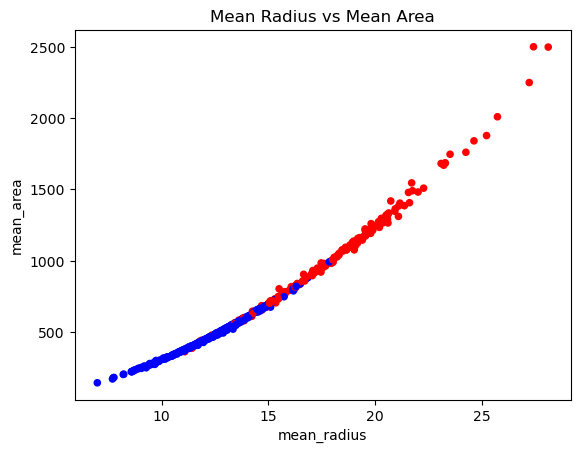

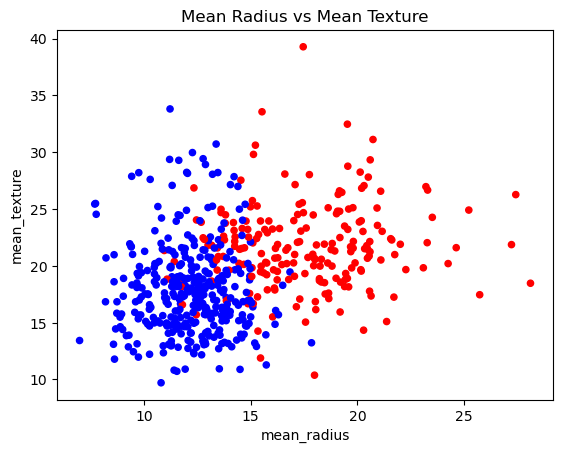

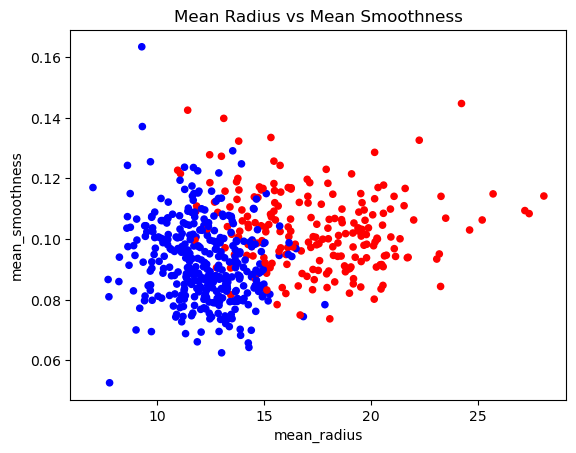

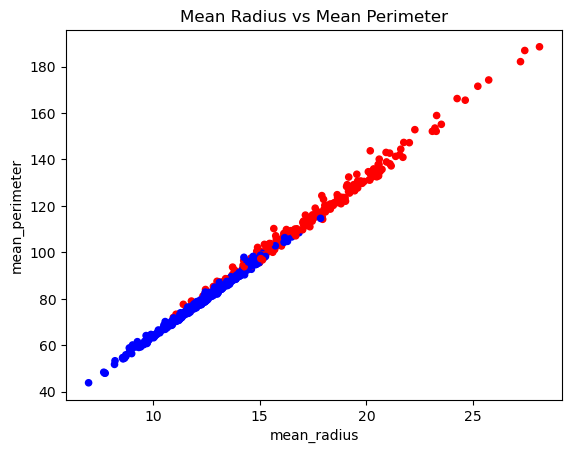

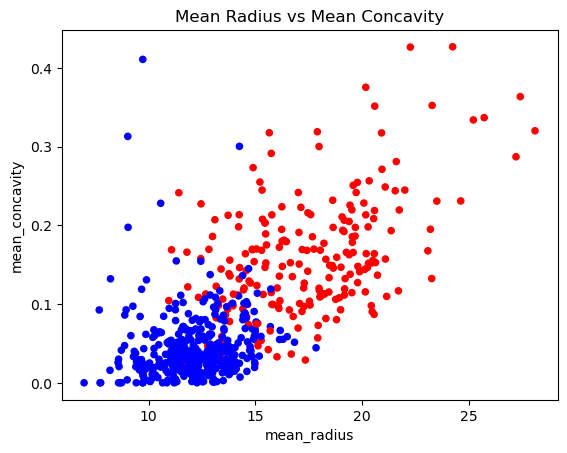

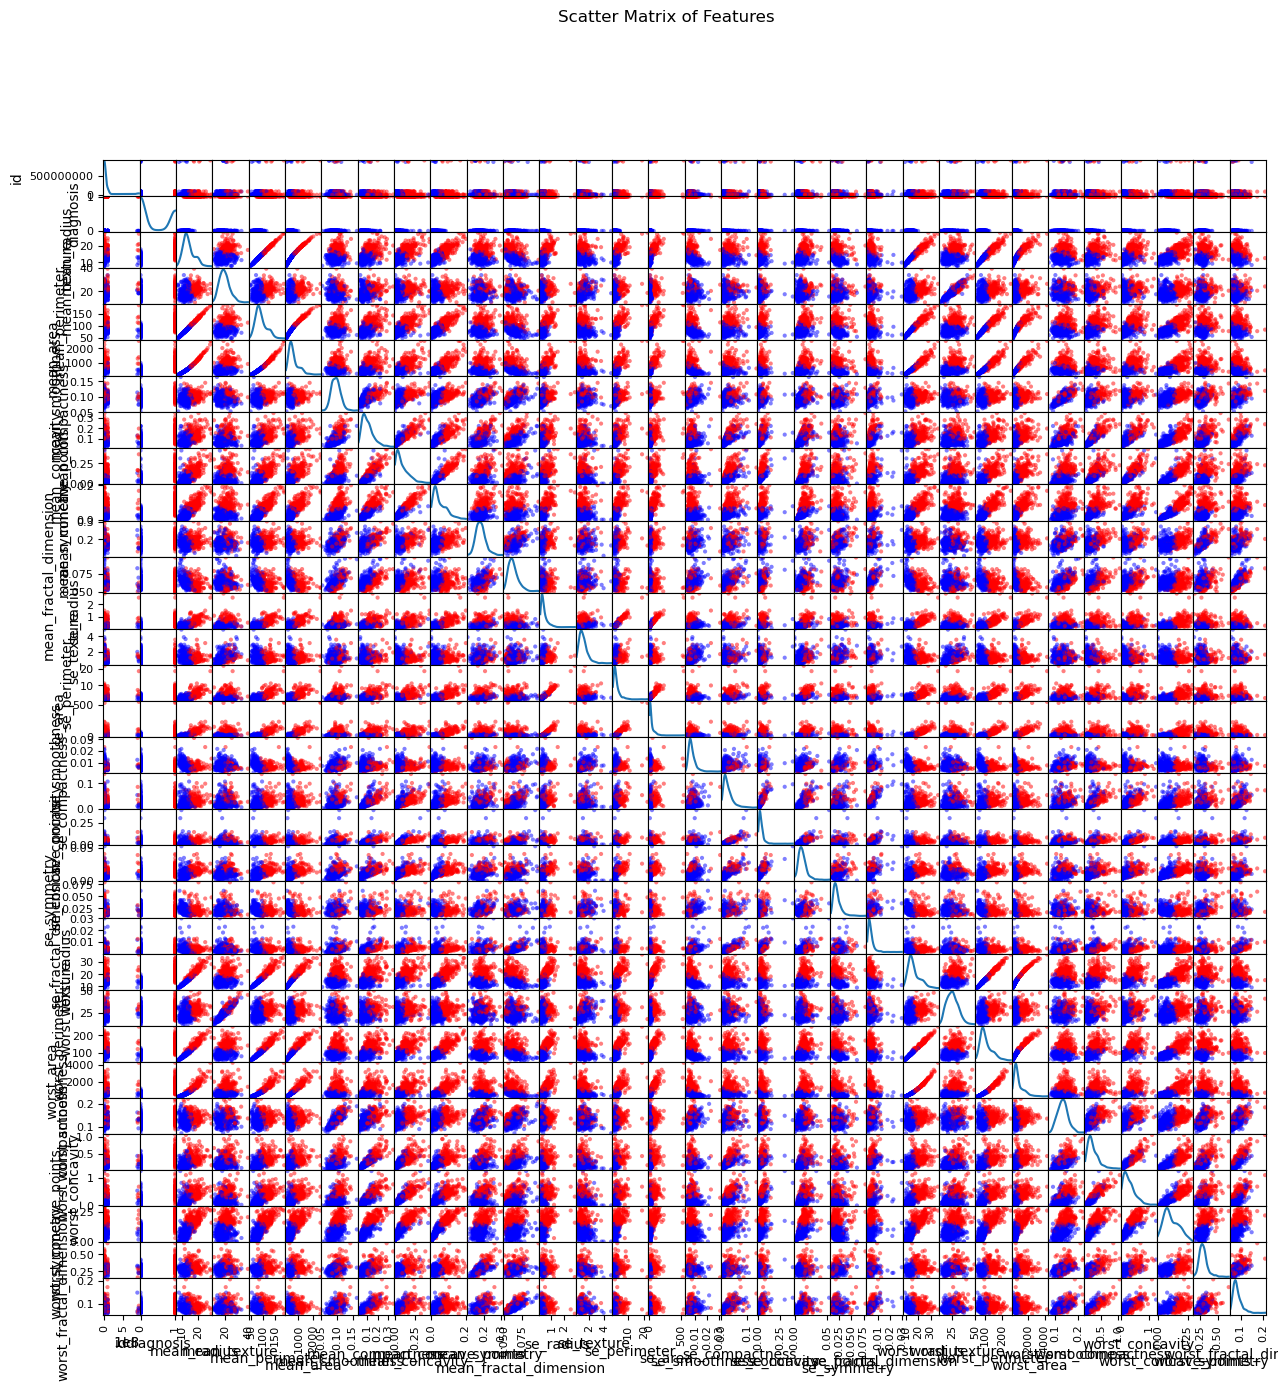

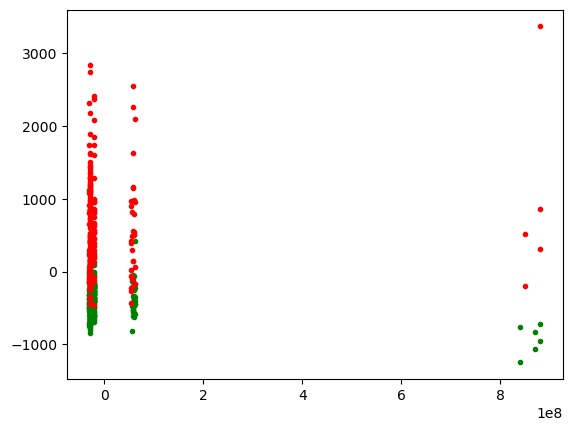

In [86]:
# Write your solutions here
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# you may need to run  pip install sklearn in Ubuntu  (may need pip3)
#from sklearn.decomposition import PCA
#import matplotlib
#from matplotlib import pyplot as plt

#plt.figure()
#PCA3=PCA(n_components=2)
#XPCA = PCA3.fit_transform(x)
#plt.plot(XPCA[y==0,0],XPCA[y==0,1],'g.')
#plt.plot(XPCA[y==1,0],XPCA[y==1,1],'r.')
#plt.show()

# you may need to run  pip install sklearn in Ubuntu  (may need pip3)
#1
data.plot.scatter(x="mean_radius", y="mean_area", c=labels, colormap="bwr")
plt.title("Mean Radius vs Mean Area")
plt.show()

data.plot.scatter(x="mean_radius", y="mean_texture", c=labels, colormap="bwr")
plt.title("Mean Radius vs Mean Texture")
plt.show()

data.plot.scatter(x="mean_radius", y="mean_smoothness", c=labels, colormap="bwr")
plt.title("Mean Radius vs Mean Smoothness")
plt.show()

data.plot.scatter(x="mean_radius", y="mean_perimeter", c=labels, colormap="bwr")
plt.title("Mean Radius vs Mean Perimeter")
plt.show()

data.plot.scatter(x="mean_radius", y="mean_concavity", c=labels, colormap="bwr")
plt.title("Mean Radius vs Mean Concavity")
plt.show()
#2
from pandas.plotting import scatter_matrix
scatter_matrix(data, c=labels, figsize=(15,15), diagonal="kde", cmap="bwr")
plt.suptitle("Scatter Matrix of Features")
plt.show()
#3
x = data.to_numpy()
y = np.array(labels)
#4
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x)

plt.figure()
PCA3=PCA(n_components=2)
XPCA = PCA3.fit_transform(x)
plt.plot(XPCA[y==0,0],XPCA[y==0,1],'g.')
plt.plot(XPCA[y==1,0],XPCA[y==1,1],'r.')
plt.show()
#5
#The principal components should be more successful at classifying tumors as benign or malignant. The first principal 
#component is the linear combination of the dataset's variables which is able to explain the largest mathematically 
#possible amount of variance in the dataset, as is true of the second PC with respects to the residual matrix you get 
#when you partial the first principal component from the correlation matrix. Thus, we should expect the principal
#components to be the best predictors of the average variable, and we should especially expect the principal components
#to be the best predictors of malignancy given that malignancy is causal for all features. Scatterplots of principal
#components are also just easier to interpret.

## Exercise 4

1. Go to [https://archive.ics.uci.edu/ml/datasets/Adult] and download the adult.names and adult.data files.
1. Display the adult.names file in your jupyter notebook. Make 2 comments about what you notice about the data set (for example, format, different values, etc.)
1. -Using pandas, make a dataframe from the adult.data file and print its head()
1. Delete the column titled 'fnlwgt' from your dataframe
1. Plot a histogram showing how many people from each working class make above 50k per year and below 50k per year
1. Similarly, plot a histogram showing how many people from each education level make above and below 50k per year
1. Choose one other category and plot a histogram similar to the above
1. Discuss the results of these histograms. What (if any) conclusions can you draw from them?

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

Text(0.5, 0.98, 'Income | Occupation')

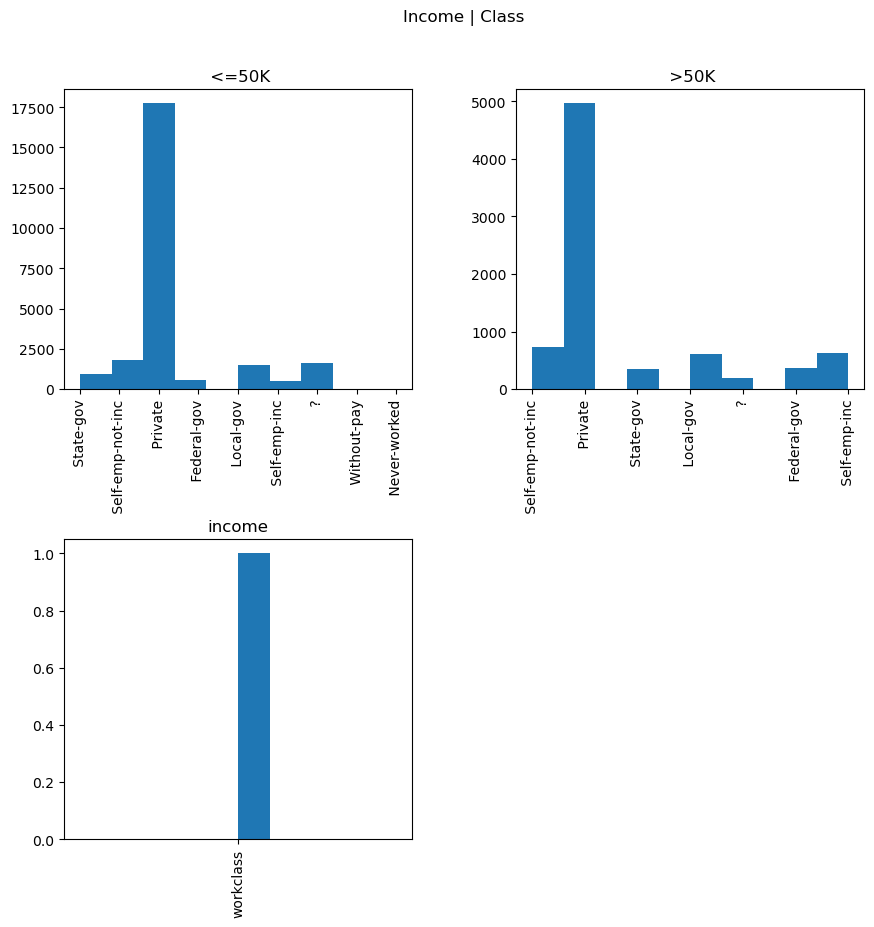

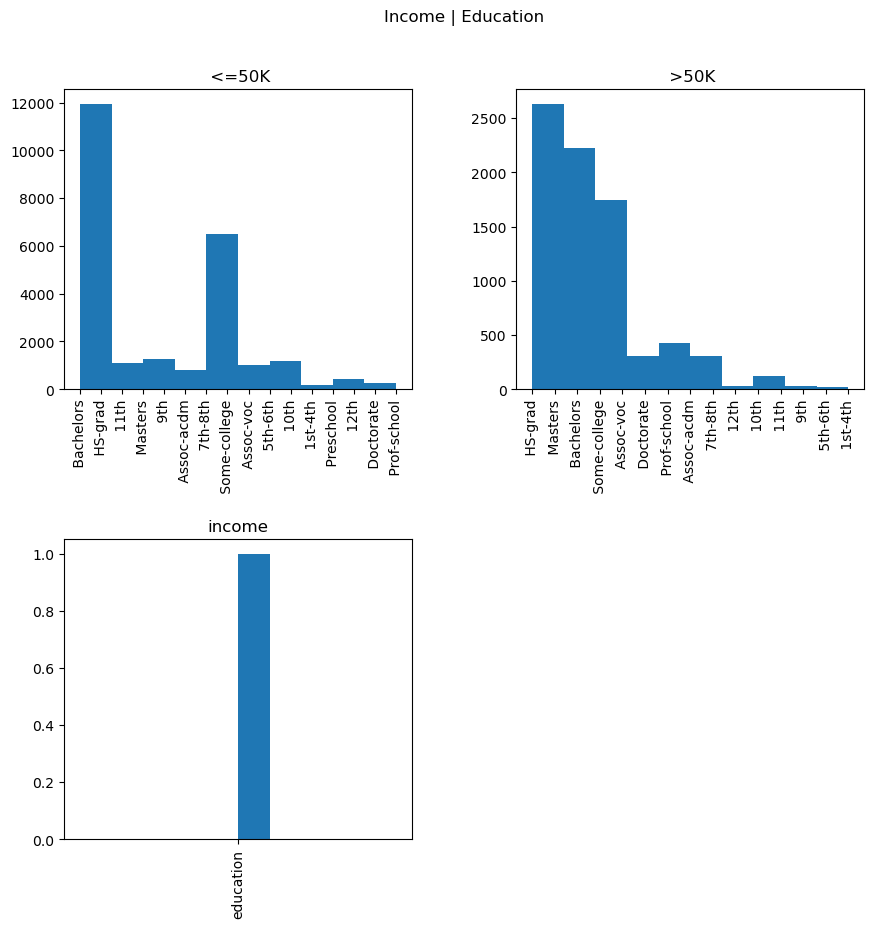

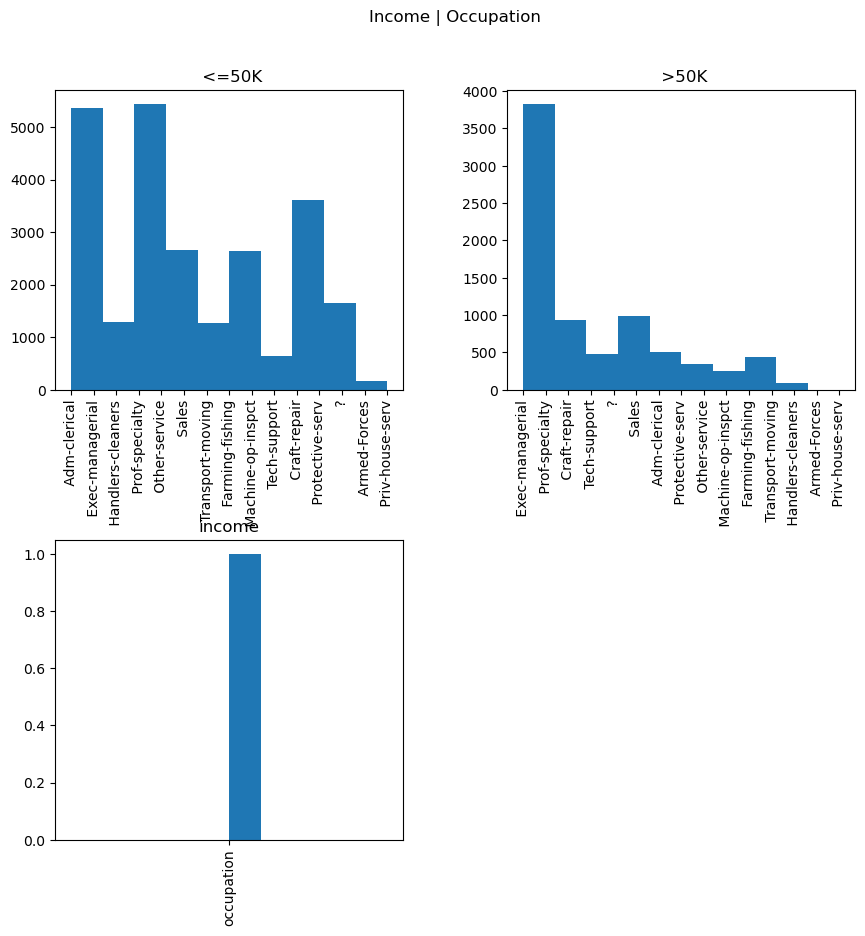

In [97]:
# Write your solutions here
#2
with open("adult.names", "r") as f:
    print(f.read())
#The attributes have different data types (nominal, ordinal, continuous, discrete).
#Missing values are indicated by "?".
#3
import pandas as pd
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv("adult.data", header=None, names=columns)
print(df.head())
#4
df = df.drop("fnlwgt", axis=1)
#5
df.hist(column="workclass", by="income", figsize=(10, 10))
plt.suptitle("Income | Class")
#6
df.hist(column="education", by="income", figsize=(10, 10))
plt.suptitle("Income | Education")
#7
df.hist(column="occupation", by="income", figsize=(10, 10))
plt.suptitle("Income | Occupation")
#8
#Those who are more educated tend to have higher incomes, those employed in the private sector make more, and people
#in executive/managerial positions make more.
#